In [72]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [73]:
Data = pd.read_csv("train.csv")
Data['Date'] = pd.to_datetime(Data['Date.of.Birth'],dayfirst=True)
Data['year'] = Data['Date'].dt.strftime("%Y")
Data['year'][Data['year'] > date.today().strftime("%Y")] = (Data['year'].astype(int) - 100).copy()
Data['year'] = Data['year'].astype(int)
Data['age'] = (int(date.today().strftime("%Y"))- Data['year'])


/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
Data = pd.read_csv("Data_train.csv")

In [75]:
Data_corr= Data[['UniqueID', 'age', 'disbursed_amount', 'asset_cost',
       'ltv', 'Employment.Type', 'PAN_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]

In [81]:
Data_corr = pd.get_dummies(Data_corr.set_index('UniqueID'))

datetime.date(2019, 4, 20)

In [92]:
from xgboost import XGBClassifier 

In [110]:
X = Data_corr.copy()
Y = Data.loan_default

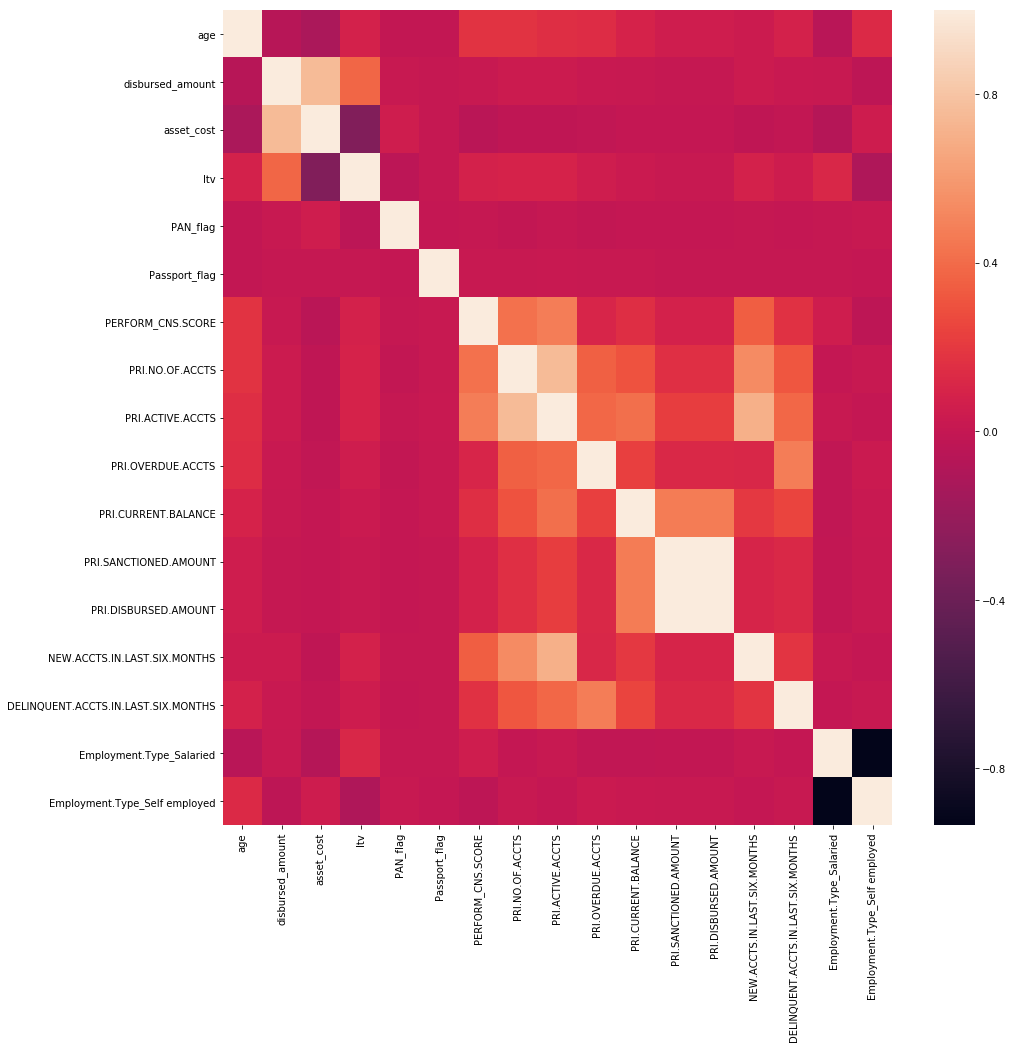

In [105]:
plt.figure(figsize = (15,15))
sns.heatmap(Data_corr.corr(),)

In [111]:
model.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [93]:
model = XGBClassifier()

In [119]:
feature_importance = pd.DataFrame({'features': Data_corr.columns, 'feature_importance': model.feature_importances_})

In [122]:
feature_importance.sort_values(by = 'feature_importance', ascending = False)

,features,feature_importance
3,ltv,0.153376
1,disbursed_amount,0.148787
6,PERFORM_CNS.SCORE,0.103685
11,PRI.SANCTIONED.AMOUNT,0.099549
14,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.071682
15,Employment.Type_Salaried,0.068140
9,PRI.OVERDUE.ACCTS,0.059264
16,Employment.Type_Self employed,0.051611
7,PRI.NO.OF.ACCTS,0.038124
8,PRI.ACTIVE.ACCTS,0.036215


In [138]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_curve


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [141]:
model = XGBClassifier()
model.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [150]:
test = pd.read_csv("test.csv")
test.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [151]:
test['Date'] = pd.to_datetime(test['Date.of.Birth'],dayfirst=True)
test['year'] = test['Date'].dt.strftime("%Y")
test['year'][test['year'] > date.today().strftime("%Y")] = (test['year'].astype(int) - 100).copy()
test['year'] = test['year'].astype(int)
test['age'] = (int(date.today().strftime("%Y"))- test['year'])


/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
test= test[['UniqueID', 'age', 'disbursed_amount', 'asset_cost',
       'ltv', 'Employment.Type', 'PAN_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]
test = pd.get_dummies(test.set_index('UniqueID'))

In [153]:
y_predicted = model.predict(test)

In [156]:
pd.DataFrame(y_predicted).to_csv("Results.csv")

In [139]:
accuracy_score(y_test,y_predicted)

0.7823121957496086

In [140]:
roc_curve( y_test,y_predicted)

(array([0.00000000e+00, 2.74145352e-04, 1.00000000e+00]),
 array([0.        , 0.00128028, 1.        ]),
 array([2, 1, 0]))

In [149]:
test.shape

(233154, 17)